In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#read in images
image0 = cv2.imread("Data/cherry.jpg")
image1 = cv2.imread("Data/banan.jpg")
image2 = cv2.imread("Data/lime.jpg")

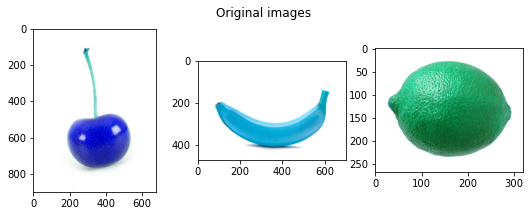

In [4]:
fig, axs = plt.subplots(1, 3,figsize=(9, 3))
fig.suptitle('Original images')
axs[0].imshow(image0)
axs[1].imshow(image1)
axs[2].imshow(image2)

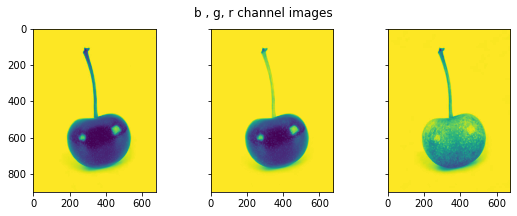

In [5]:
#display rgb channels
b, g, r = cv2.split(image0)
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(9, 3))
fig.suptitle('b , g, r channel images')
axs[0].imshow(b)
axs[1].imshow(g)
axs[2].imshow(r)

In [6]:
#convert to gray scale
image0_gray = cv2.cvtColor(image0, cv2.COLOR_BGR2GRAY)
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

image0_gray dimensions:  (900, 675)
image1_gray dimensions:  (469, 700)
image2_gray dimensions:  (268, 320)


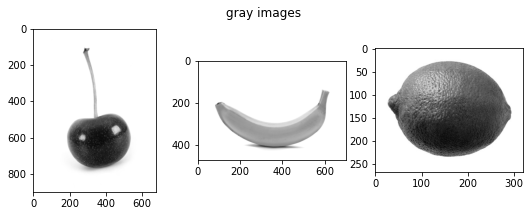

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
fig.suptitle('gray images')
axs[0].imshow(image0_gray, cmap = 'gray')
axs[1].imshow(image1_gray, cmap = 'gray')
axs[2].imshow(image2_gray, cmap = 'gray')
print('image0_gray dimensions: ', image0_gray.shape)
print('image1_gray dimensions: ', image1_gray.shape)
print('image2_gray dimensions: ', image2_gray.shape)

In [8]:
#parametrized resize function
def resize_f(img_shape):
    height = img_shape[0]
    width = img_shape[1]
    aspect_ratio = width/height
    width  = 256 * aspect_ratio
    offset = width%8
    if(offset != 0):
        if(offset > 4):
            width = width - offset + 8
        else:
            width = width - offset
    return int(width)

In [9]:
#resize images
image0_resized = cv2.resize(image0_gray, (resize_f(image0_gray.shape), 256))
image1_resized = cv2.resize(image1_gray, (resize_f(image1_gray.shape), 256))
image2_resized = cv2.resize(image2_gray, (resize_f(image2_gray.shape), 256))
print("IMAGE0 original: ", image0_gray.shape, " resized: ", image0_resized.shape)
print("IMAGE1 original: ", image1_gray.shape, " resized: ", image1_resized.shape)
print("IMAGE2 original: ", image2_gray.shape, " resized: ", image2_resized.shape)

IMAGE0 original:  (900, 675)  resized:  (256, 192)
IMAGE1 original:  (469, 700)  resized:  (256, 384)
IMAGE2 original:  (268, 320)  resized:  (256, 304)


# Block Feature Vectors

In [10]:
def block_(a):
    b = []
    c = []
    for i in range(0, a.shape[0]-8, 8):
        for j in range(0, a.shape[1]-8, 8):
            b = a[i:i+8, j:j+8]
            c.append(b)
            
    return c

### Image 0 block feature space

In [11]:
block0_list = block_(image0_resized)
block0 = np.asarray(block0_list, dtype=np.float32).reshape(-1, 64)
df0_block = pd.DataFrame(block0)
df0_block[64] = 0
df0_block.to_csv('Data/block_feature_vectors_0.csv', index = False)

In [12]:
df0_block

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
709,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
710,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
711,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0


### Image1 Block Feature Space

In [13]:
block1_list = block_(image1_resized)
block1 = np.asarray(block1_list, dtype=np.float32).reshape(-1, 64)
df1_block = pd.DataFrame(block1)
df1_block[64] = 1
df1_block.to_csv('Data/block_feature_vectors_1.csv', index = False)

In [14]:
df1_block

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
1453,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
1454,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
1455,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1


### Image2 Block Feature Space

In [15]:
block2_list = block_(image2_resized)
block2 = np.asarray(block2_list, dtype=np.float32).reshape(-1, 64)
df2_block = pd.DataFrame(block2)
df2_block[64] = 2
df2_block.to_csv('Data/block_feature_vectors_2.csv', index = False)

In [17]:
df2_block

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
1143,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
1144,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
1145,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2


# Sliding Block Feature Vector

In [18]:
def sliding_block(a):
    b = []
    c = []
    for i in range(0, a.shape[0]-8):
        for j in range(0, a.shape[1]-8):
            b = a[i:i+8, j:j+8]
            c.append(b)
            
    return c

### Image0 sliding-block feature space

In [19]:
sliding_block0_list = sliding_block(image0_resized)
sliding_block0 = np.asarray(sliding_block0_list, dtype=np.float32).reshape(-1, 64)
df0_sblock = pd.DataFrame(sliding_block0)
df0_sblock[64] = 0
df0_sblock.to_csv('Data/sliding_block_feature_vectors_0.csv', index = False)

In [20]:
df0_sblock

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45627,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
45628,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
45629,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
45630,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0


### Image1 sliding-block feature space

In [22]:
sliding_block1_list = sliding_block(image1_resized)
sliding_block1 = np.asarray(sliding_block1_list, dtype=np.float32).reshape(-1, 64)
df1_sblock = pd.DataFrame(sliding_block1)
df1_sblock[64] = 1
df1_sblock.to_csv('Data/sliding_block_feature_vectors_1.csv', index = False)

In [23]:
df1_sblock

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93243,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
93244,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
93245,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
93246,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1


### Image2 sliding-block feature space

In [24]:
sliding_block2_list = sliding_block(image2_resized)
sliding_block2 = np.asarray(sliding_block2_list, dtype=np.float32).reshape(-1, 64)
df2_sblock = pd.DataFrame(sliding_block2)
df2_sblock[64] = 2
df2_sblock.to_csv('Data/sliding_block_feature_vectors_2.csv', index = False)

In [25]:
df2_sblock

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73403,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
73404,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
73405,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
73406,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2


# Statistical Descriptors

In [28]:
df0_block.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,...,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.0
mean,230.744736,230.744736,230.746140,230.781204,231.161285,231.165497,231.252457,230.981766,230.849930,230.757370,...,230.844315,230.917252,230.806458,230.814865,230.976151,231.288925,230.934082,231.169708,230.796631,0.0
std,56.168194,56.437756,56.248718,56.356358,55.922802,55.796543,55.639519,55.508099,55.993454,56.393478,...,55.790325,55.713818,56.128464,56.220440,56.252449,56.081585,56.336235,55.656410,55.889278,0.0
min,57.000000,56.000000,57.000000,56.000000,54.000000,55.000000,55.000000,57.000000,58.000000,58.000000,...,55.000000,57.000000,55.000000,56.000000,55.000000,58.000000,55.000000,58.000000,56.000000,0.0
25%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,0.0
50%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,0.0
75%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,0.0
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,0.0


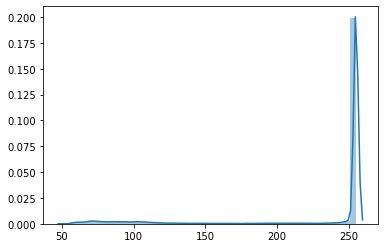

In [41]:
sns.distplot(df0_block.drop(64, axis = 1), kde_kws={'bw':1.5})

# Construct a Feature Space

In [42]:
#merge 0, 1
df01_block = pd.concat([df0_block, df1_block])

In [43]:
df01_block

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
1453,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
1454,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
1455,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1


In [44]:
df01r_block = df01_block.sample(frac = 1)

In [45]:
df01r_block

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1239,142.0,145.0,147.0,150.0,147.0,149.0,150.0,152.0,207.0,160.0,...,225.0,221.0,220.0,214.0,212.0,210.0,208.0,206.0,201.0,1
899,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
1097,164.0,163.0,163.0,162.0,160.0,161.0,161.0,159.0,164.0,164.0,...,165.0,171.0,171.0,171.0,168.0,168.0,169.0,168.0,168.0,1
1280,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
433,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
603,254.0,255.0,255.0,254.0,246.0,198.0,167.0,152.0,255.0,255.0,...,184.0,253.0,253.0,248.0,191.0,155.0,173.0,181.0,184.0,1
26,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
409,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,254.0,251.0,255.0,255.0,255.0,255.0,255.0,255.0,0
